# Null geodesics in Schwarzschild spacetime

In [1]:
version()

'SageMath version 8.9.rc1, Release Date: 2019-09-24'

In [2]:
%display latex

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
X.<t, r, th, ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.metric()
m = 1
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2/r - 1) dt*dt - 1/(2/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [5]:
Xcart.<t, x, y, z> = M.chart()
X_to_Xcart = X.transition_map(Xcart, [t, r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
X_to_Xcart.display()

t = t
x = r*cos(ph)*sin(th)
y = r*sin(ph)*sin(th)
z = r*cos(th)

In [6]:
M.top_charts()

[Chart (M, (t, r, th, ph)), Chart (M, (t, x, y, z))]

In [7]:
M._top_charts = [X]
M.top_charts()

[Chart (M, (t, r, th, ph))]

In [8]:
M.identity_map().coord_functions(X, Xcart)

Coordinate functions (t, r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th)) on the Chart (M, (t, r, th, ph))

In [9]:
r0 = 3
ph0 = 0
b = 3*sqrt(3)
E = 1

In [10]:
def initial_vector(r0, b, ph0=0, E=1, inward=False):
    t0, th0 = 0, pi/2
    L = b*E
    vt0 = 1/(1-2*m/r0)
    vr0 = sqrt(E^2 - L^2/r0^2*(1-2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = L / r0^2
    p0 = M((t0, r0, th0, ph0), name='p_0')
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

In [11]:
v0 = initial_vector(r0, b)
v0.display()

v_0 = 3 d/dt + 1/3*sqrt(3) d/dph

In [12]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0

In [13]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

In [14]:
sol = geod.solve(step=0.01, method="ode_int")       # numerical integration
interp = geod.interpolate()              # interpolation of the solution for the plot

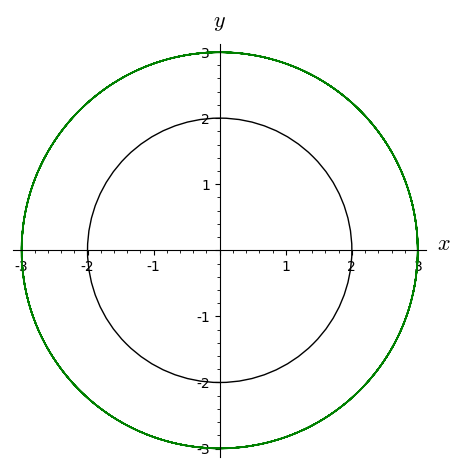

In [17]:
graph = circle((0, 0), 2*m, color='black')
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                             aspect_ratio=1, color='green')        
graph

In [18]:
U(r) = (1 - 2/r)/r^2

In [19]:
U1 = 0.02
b = 1/sqrt(U1)
r0 = 10
v0 = initial_vector(r0, b, inward=True)
v0.display()

v_0 = 5/4 d/dt - 0.774596669241483 d/dr + 0.0707106781186548 d/dph

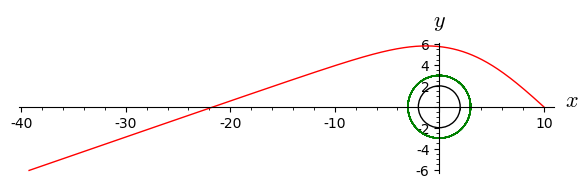

In [20]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
sol = geod.solve(step=0.01, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='red')        
graph

In [21]:
U1 = 0.04
b = 1/sqrt(U1)
r0 = 10
v0 = initial_vector(r0, b, inward=True)
v0.display()

v_0 = 5/4 d/dt - 0.894427190999916 d/dr + 0.0500000000000000 d/dph

In [22]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0.000000000000000

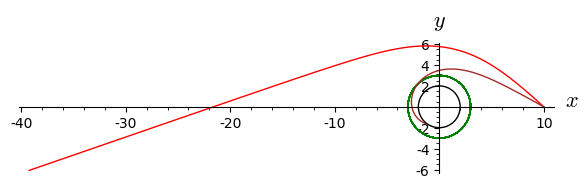

In [23]:
geod = M.integrated_geodesic(g, (s, 0, 13.25), v0)
sol = geod.solve(step=0.001, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='brown')        
graph

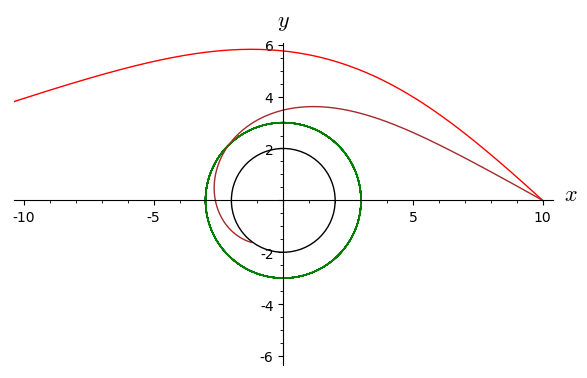

In [24]:
show(graph, xmin=-10)

In [25]:
U1 = 0.046
b = 1/sqrt(U1)
r0 = 2.1
v0 = initial_vector(r0, b)
v0.display()

v_0 = 21.0000000000000 d/dt + 0.874792273707413 d/dr + 1.05726168734729 d/dph

In [26]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

4.440892098500626e-15

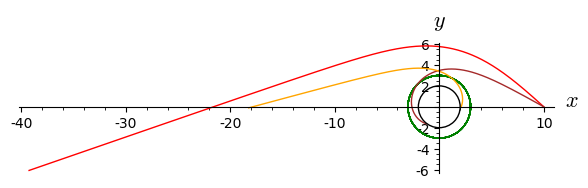

In [27]:
geod = M.integrated_geodesic(g, (s, 0, 20), v0)
sol = geod.solve(step=0.001, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='orange')        
graph

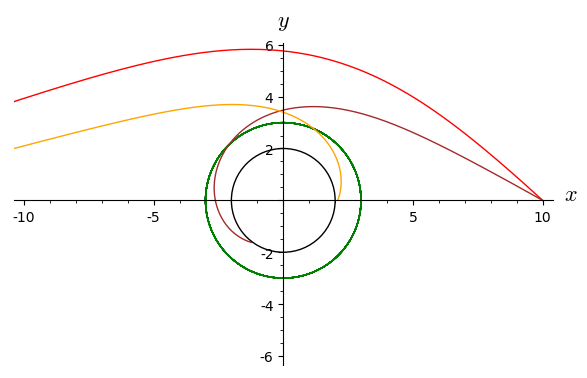

In [28]:
show(graph, xmin=-10)

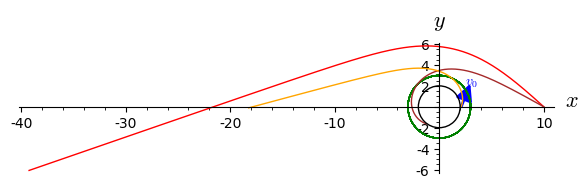

In [29]:
graph += v0.plot(chart=Xcart, ambient_coords=(x,y))
graph

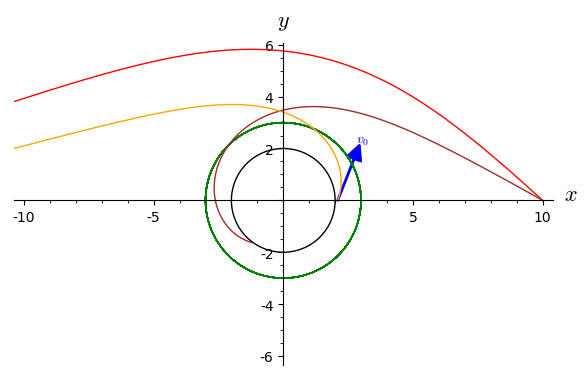

In [30]:
show(graph, xmin=-10)